In [1]:
!pip install kaggle


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("data.csv")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 162365: invalid start byte

In [4]:
df = pd.read_csv("data.csv", encoding="latin1")


/tmp/ipython-input-2840565145.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


In [5]:
df.columns


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [6]:
x = df["no2"].dropna()
x = x.astype(float)


Roll Number Based Parameter Calculation

My university roll number is 102303289.

According to the formula:

a = 0.05 × (r mod 7)
b = 0.3 × (r mod 5 + 1)

First, I calculated:

102303289 mod 7 = 3
So, a = 0.05 × 3 = 0.15

Next,

102303289 mod 5 = 4
So, b = 0.3 × (4 + 1) = 1.5

Therefore, the transformation becomes:

z = x + 0.15 sin(1.5x)

In [8]:
z = x + 0.15 * np.sin(1.5 * x)


In [9]:
mu = np.mean(z)
variance = np.var(z)
lam = 1 / (2 * variance)
c = 1 / np.sqrt(2 * np.pi * variance)


In [10]:
print("mu =", mu)
print("lambda =", lam)
print("c =", c)


mu = 25.814687284943872
lambda = 0.001461229813311488
c = 0.021566731221108623


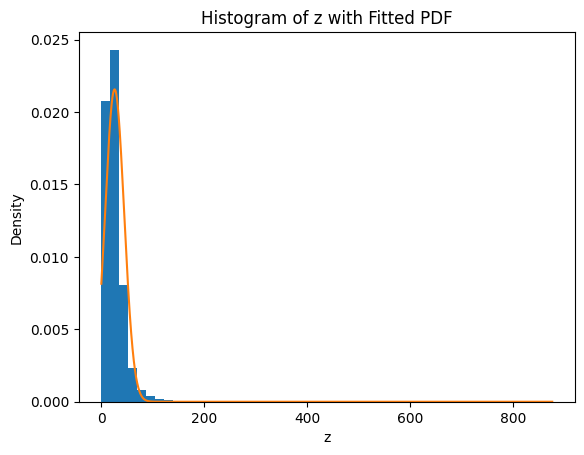

In [11]:
import matplotlib.pyplot as plt

z_sorted = np.sort(z)
pdf = c * np.exp(-lam * (z_sorted - mu)**2)

plt.hist(z, bins=50, density=True)
plt.plot(z_sorted, pdf)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Histogram of z with Fitted PDF")
plt.show()
